In [13]:
import pickle as pkl


obj = pkl.load(open("/home/bachelor/ml-carbucks/optuna/ensemble/20251123_155224_ensemble_initial/prestep_20251123_155224_ensemble_initial.pkl", "rb"))
(
    adapters_predictions,
    ground_truths,
    distributions,
    adapters_crossval_metrics,
) = obj


In [14]:
[[m["map_50"] for m in metrics] for metrics in adapters_crossval_metrics]

[[0.09181614965200424],
 [0.0674637034535408],
 [0.05522765964269638],
 [0.08611134439706802]]

In [15]:
from matplotlib import pyplot as plt

all_scores = [
    [] for _ in range(len(adapters_predictions))
]

for i, preds in enumerate(adapters_predictions):
    all_scores[i] = []
    for p in preds:
        for scores in p['scores']:
            all_scores[i].append(scores.item())
    


In [16]:
#subplot histograms of all adapters scores in 2x2 grid
import numpy as np


def plot_histograms(all_scores, info_title=''):
    # make seeded color from title
    np.random.seed(abs(hash(info_title)) % (2**32))
    colors = np.random.rand(len(all_scores), 3)
    fig, axs = plt.subplots(2, 2, figsize=(10, 5))
    axs = axs.flatten()
    for i, scores in enumerate(all_scores):
        axs[i].hist(scores, bins=50, color=colors[0])
        axs[i].set_title(f'Adapter {i} prediction scores distribution {info_title}')
    plt.tight_layout()
    plt.show()

In [17]:
from torch import erf
import torch


minmax_normalized_scores = []
for scores in all_scores:
    min_score = min(scores)
    max_score = max(scores)
    norm_scores = [(s - min_score) / (max_score - min_score) for s in scores]
    minmax_normalized_scores.append(norm_scores)

zscore_normalized_scores = []
for scores in all_scores:
    mean_score = sum(scores) / len(scores)
    std_score = (sum((s - mean_score) ** 2 for s in scores) / len(scores)) ** 0.5
    norm_scores = [(s - mean_score) / std_score for s in scores]
    zscore_normalized_scores.append(norm_scores)

zscore_probability_normalized_scores = []
for scores in all_scores:
    mean_score = sum(scores) / len(scores)
    std_score = (sum((s - mean_score) ** 2 for s in scores) / len(scores)) ** 0.5
    zscore_scores = [(s - mean_score) / std_score for s in scores]
    prob_scores = [0.5 * (1 + erf(torch.tensor(s) / (2 ** 0.5))) for s in zscore_scores]
    zscore_probability_normalized_scores.append(prob_scores)

persentile_normalized_scores = []
for scores in all_scores:
    sorted_scores = sorted(scores)
    norm_scores = [sorted_scores.index(s) / len(scores) for s in scores]
    persentile_normalized_scores.append(norm_scores)



In [18]:
for i, adapter_scores in enumerate(all_scores):
    print(f"adapter {i} produced {len(adapter_scores)} scores")

adapter 0 produced 2646 scores
adapter 1 produced 3593 scores
adapter 2 produced 7933 scores
adapter 3 produced 7911 scores


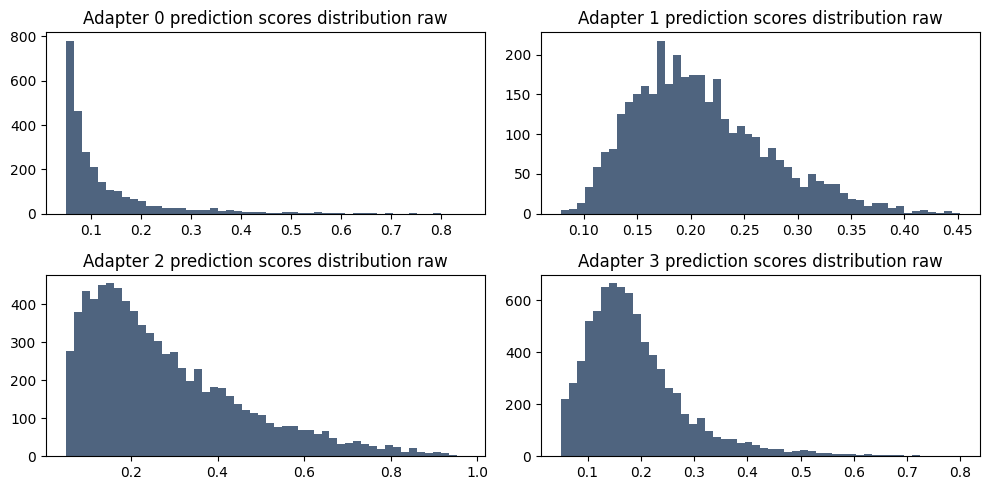

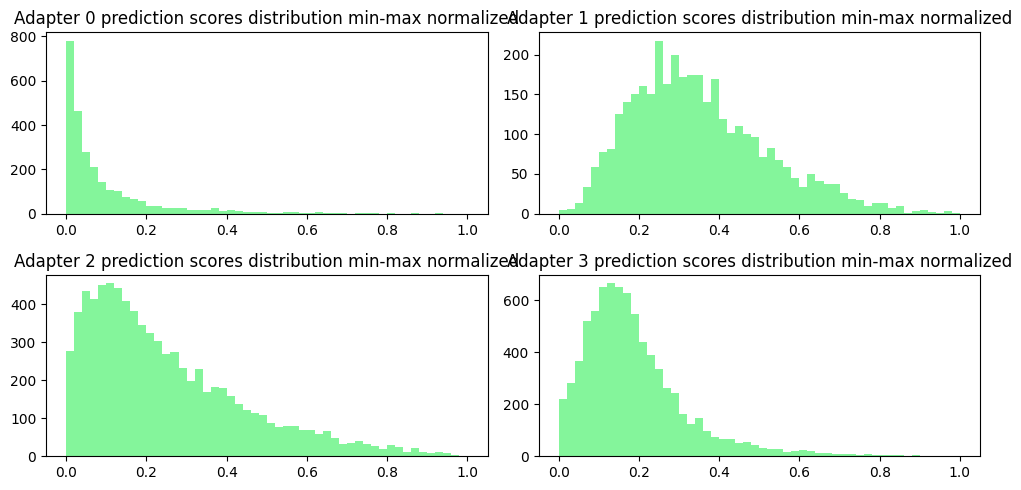

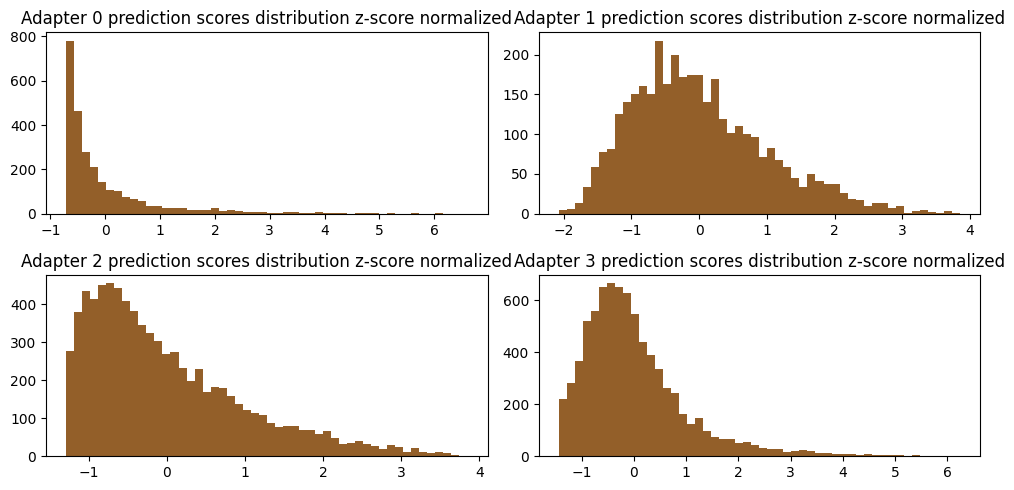

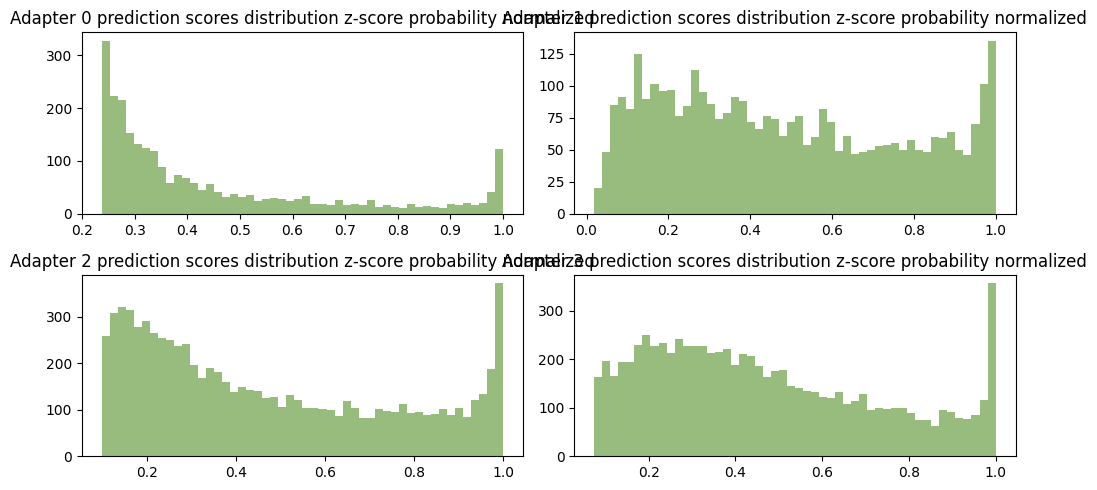

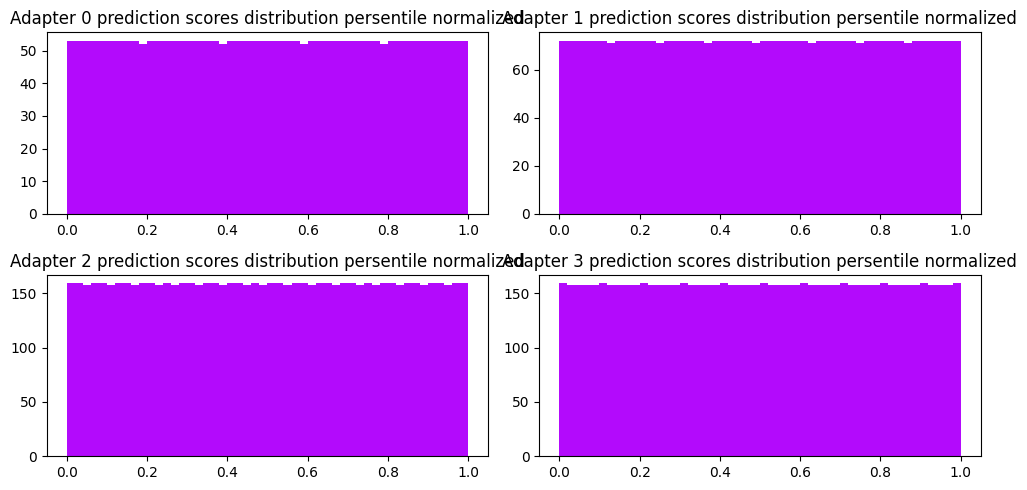

In [19]:
plot_histograms(all_scores, info_title='raw')
plot_histograms(minmax_normalized_scores, info_title='min-max normalized')
plot_histograms(zscore_normalized_scores, info_title='z-score normalized')
plot_histograms(zscore_probability_normalized_scores, info_title='z-score probability normalized')
plot_histograms(persentile_normalized_scores, info_title='persentile normalized')